In [1]:
import networkx as nx
import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily

In [2]:
ct_counties = ['New Haven County, Connecticut, USA', 'Middlesex County, Connecticut, USA', 'Tolland County, Connecticut, USA', 
              'Hartford County, Connecticut, USA', 'Fairfield County, Connecticut, USA']
          #{'city':'Los Altos Hills', 'state':'California'},
          #'Loyola, California']
graph = ox.graph_from_place(ct_counties, network_type='drive')
area = ox.geocode_to_gdf(ct_counties)

In [3]:
desired_building_types = ['school', 'commercial', 'retail','office','garage','hotel','church','train_station','dormitory',
                          'mosque','warehouse','stadium','clubhouse','chapel','fire_station','university','kindergarten',
                         'service','construction','hospital','plant_nursery','greenhouse','public','government','farm_auxiliary',
                         'farm','boathouse','sports_centre','dome','hangar','kiosk','college','napa auto parts','cathedral',
                         'synagogue','library','museum','convent','store','yes;commercial','university;yes','supermarket','parish_hall',
                          'motel','roof;commercial']


bldgs = ox.geometries_from_place(ct_counties, tags={'building': desired_building_types})
unique_building_types = bldgs['building'].unique()


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_16672\3824436139.py:9: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(ct_counties, tags={'building': desired_building_types})


In [4]:
# Retrieve nodes and edges
intxns, streets = ox.graph_to_gdfs(graph)

(-73.809242985, -72.017739315, 40.896593045, 42.093172055)

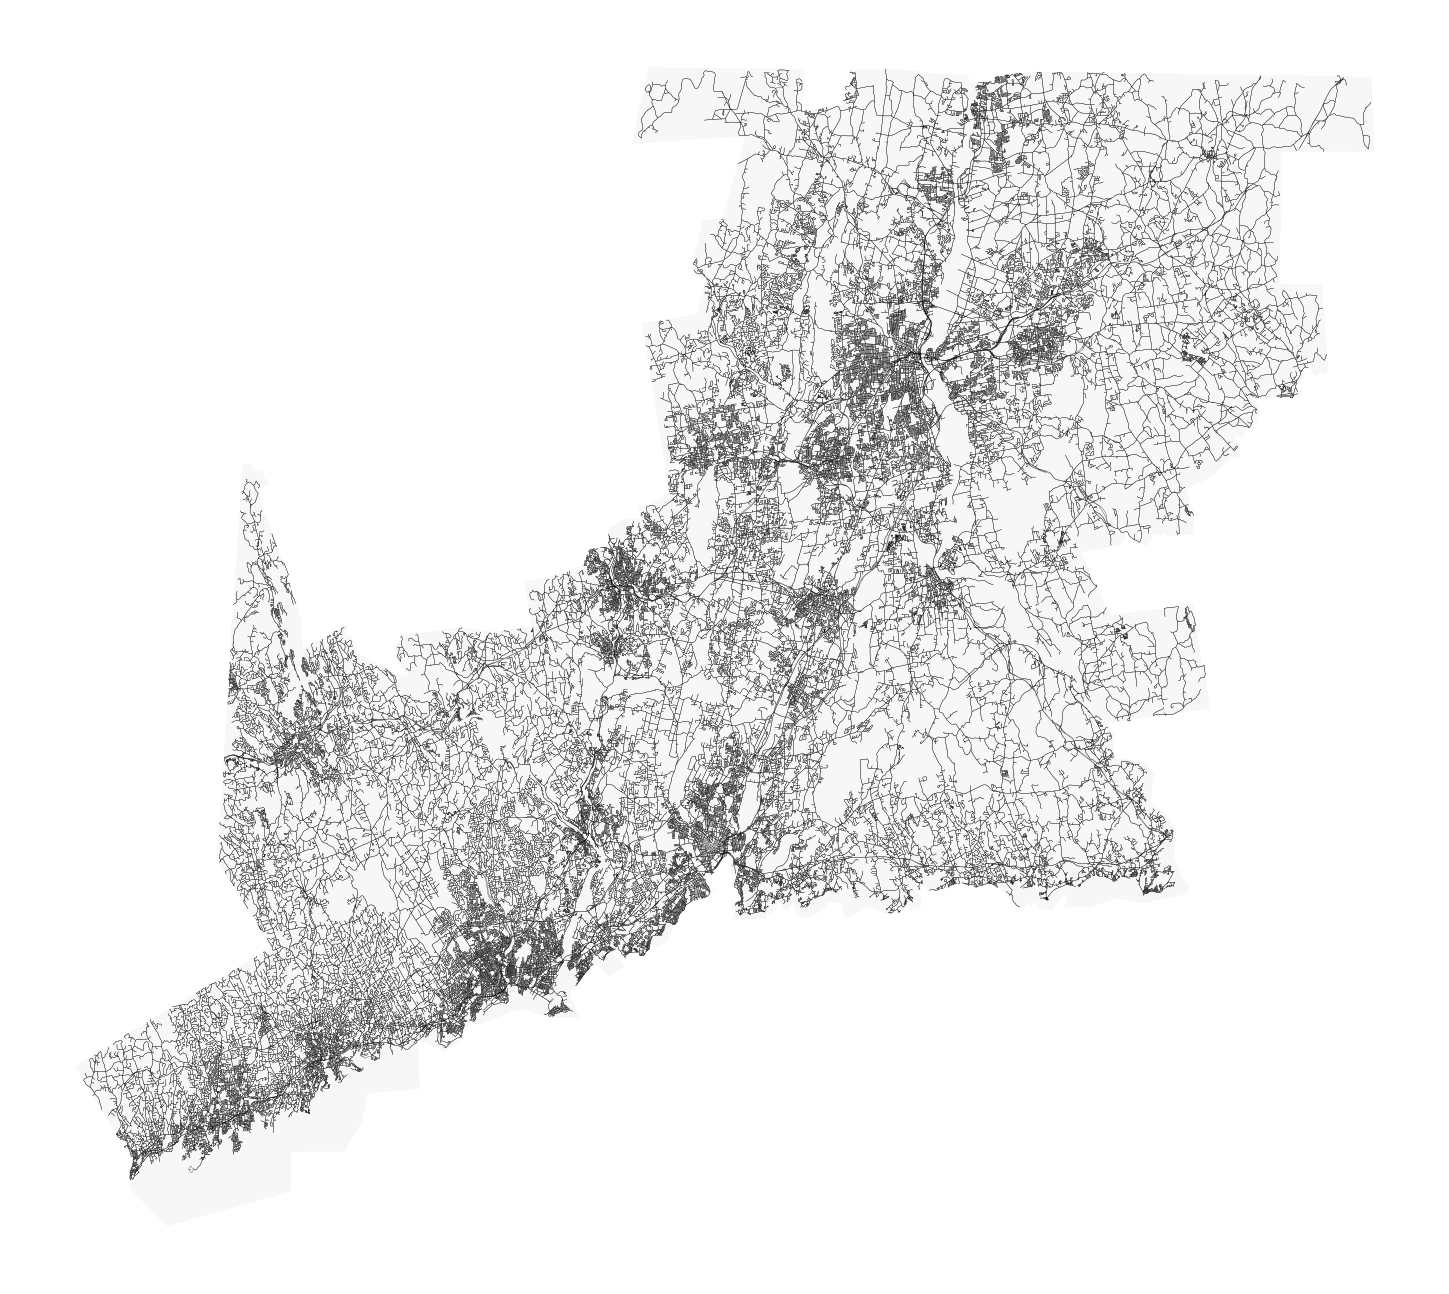

In [5]:
#STREETS
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, facecolor='.9',alpha=.3)
streets.plot(ax=ax, linewidth=.2, edgecolor='k')
plt.tight_layout()
ax.axis('off')
#plt.savefig('../figures/pv-streets.png',dpi=120)

In [6]:
bldgs.index.unique(level=0)

Index(['way', 'relation', 'node'], dtype='object', name='element_type')

In [7]:
len(bldgs)

7915

In [8]:
bldgs.geometry

element_type  osmid   
way           43021140    POLYGON ((-73.36779 41.13617, -73.36777 41.136...
              53332916    POLYGON ((-73.23773 41.17990, -73.23776 41.179...
              53435628    POLYGON ((-73.22928 41.17636, -73.22929 41.176...
              53435631    POLYGON ((-73.22781 41.17212, -73.22784 41.172...
              53435632    POLYGON ((-73.23003 41.17189, -73.23002 41.171...
                                                ...                        
relation      9251131     POLYGON ((-72.37078 41.28939, -72.37078 41.289...
              11030202    POLYGON ((-72.53248 41.30095, -72.53236 41.300...
              11030387    POLYGON ((-72.51988 41.29733, -72.51991 41.297...
              13073701    POLYGON ((-72.61580 41.29433, -72.61608 41.294...
              14012177    POLYGON ((-72.39658 41.28907, -72.39658 41.289...
Name: geometry, Length: 7915, dtype: geometry

In [9]:
bldgs.iloc[bldgs.index.get_level_values('element_type')!='node']['geometry']

element_type  osmid   
way           43021140    POLYGON ((-73.36779 41.13617, -73.36777 41.136...
              53332916    POLYGON ((-73.23773 41.17990, -73.23776 41.179...
              53435628    POLYGON ((-73.22928 41.17636, -73.22929 41.176...
              53435631    POLYGON ((-73.22781 41.17212, -73.22784 41.172...
              53435632    POLYGON ((-73.23003 41.17189, -73.23002 41.171...
                                                ...                        
relation      9251131     POLYGON ((-72.37078 41.28939, -72.37078 41.289...
              11030202    POLYGON ((-72.53248 41.30095, -72.53236 41.300...
              11030387    POLYGON ((-72.51988 41.29733, -72.51991 41.297...
              13073701    POLYGON ((-72.61580 41.29433, -72.61608 41.294...
              14012177    POLYGON ((-72.39658 41.28907, -72.39658 41.289...
Name: geometry, Length: 7904, dtype: geometry

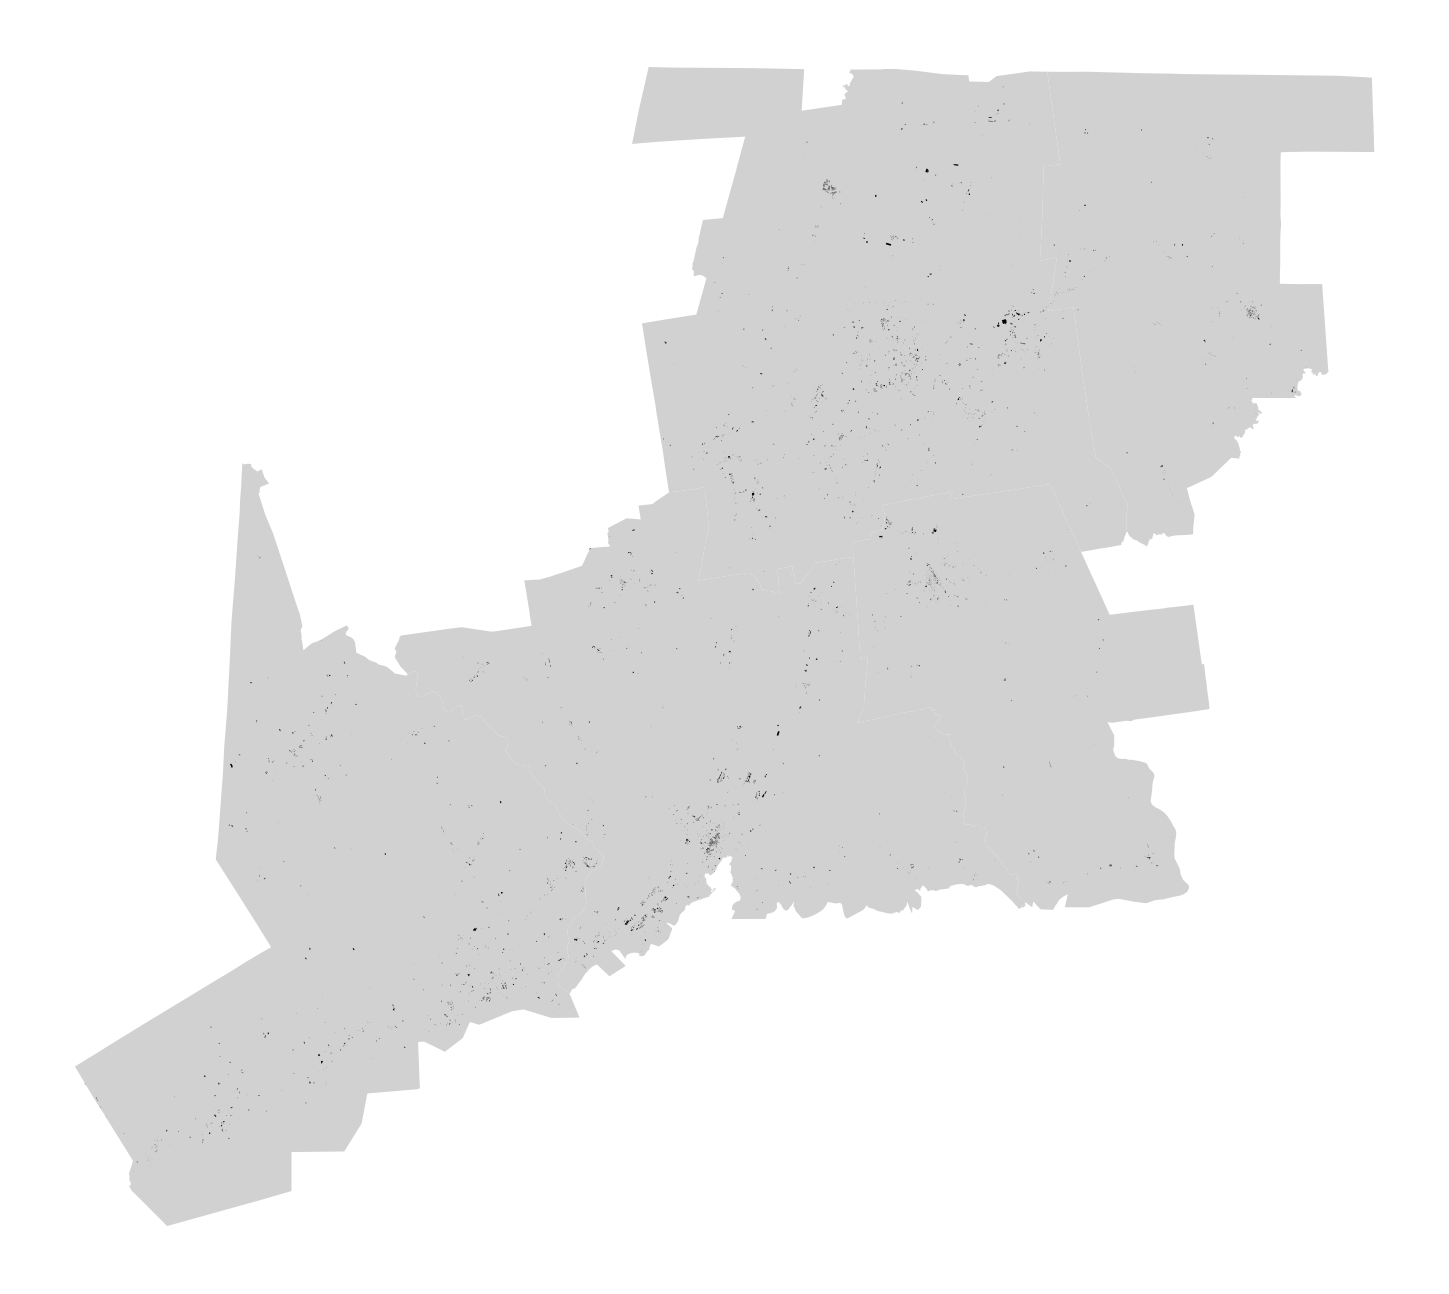

In [32]:
#BLDGS
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, facecolor='0.8',alpha=.9)#, edgecolor='k')
blgds_no_nodes = bldgs.iloc[bldgs.index.get_level_values('element_type')!='node']['geometry']
blgds_no_nodes.plot(ax=ax, facecolor='black', alpha=1)
plt.tight_layout()
ax.axis('off')
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/building-footprint.png', dpi=100,bbox_inches='tight')

In [11]:
# Convert the building_geometries GeoDataFrame to a GeoSeries of geometries
building_geometries_series = gpd.GeoSeries(bldgs.geometry)

# Calculate the total building footprint area
total_footprint_area = building_geometries_series.area.sum()

# Print the total building footprint area
print("Total Building Footprint Area:", total_footprint_area)

Total Building Footprint Area: 0.0014727851374199542


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_16672\4059233880.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_footprint_area = building_geometries_series.area.sum()


In [12]:
#from the crs from this website: https://epsg.io/6433
projected_crs = 'EPSG:6433'

# Reproject the building geometries to the projected CRS
building_geometries_projected = bldgs.to_crs(projected_crs)

# Calculate the total building footprint area in the projected CRS
total_footprint_area_projected = building_geometries_projected.area.sum()

# Print the total building footprint area in the projected CRS
print("Total Building Footprint Area (Projected):", total_footprint_area_projected)

Total Building Footprint Area (Projected): 13654272.261389654


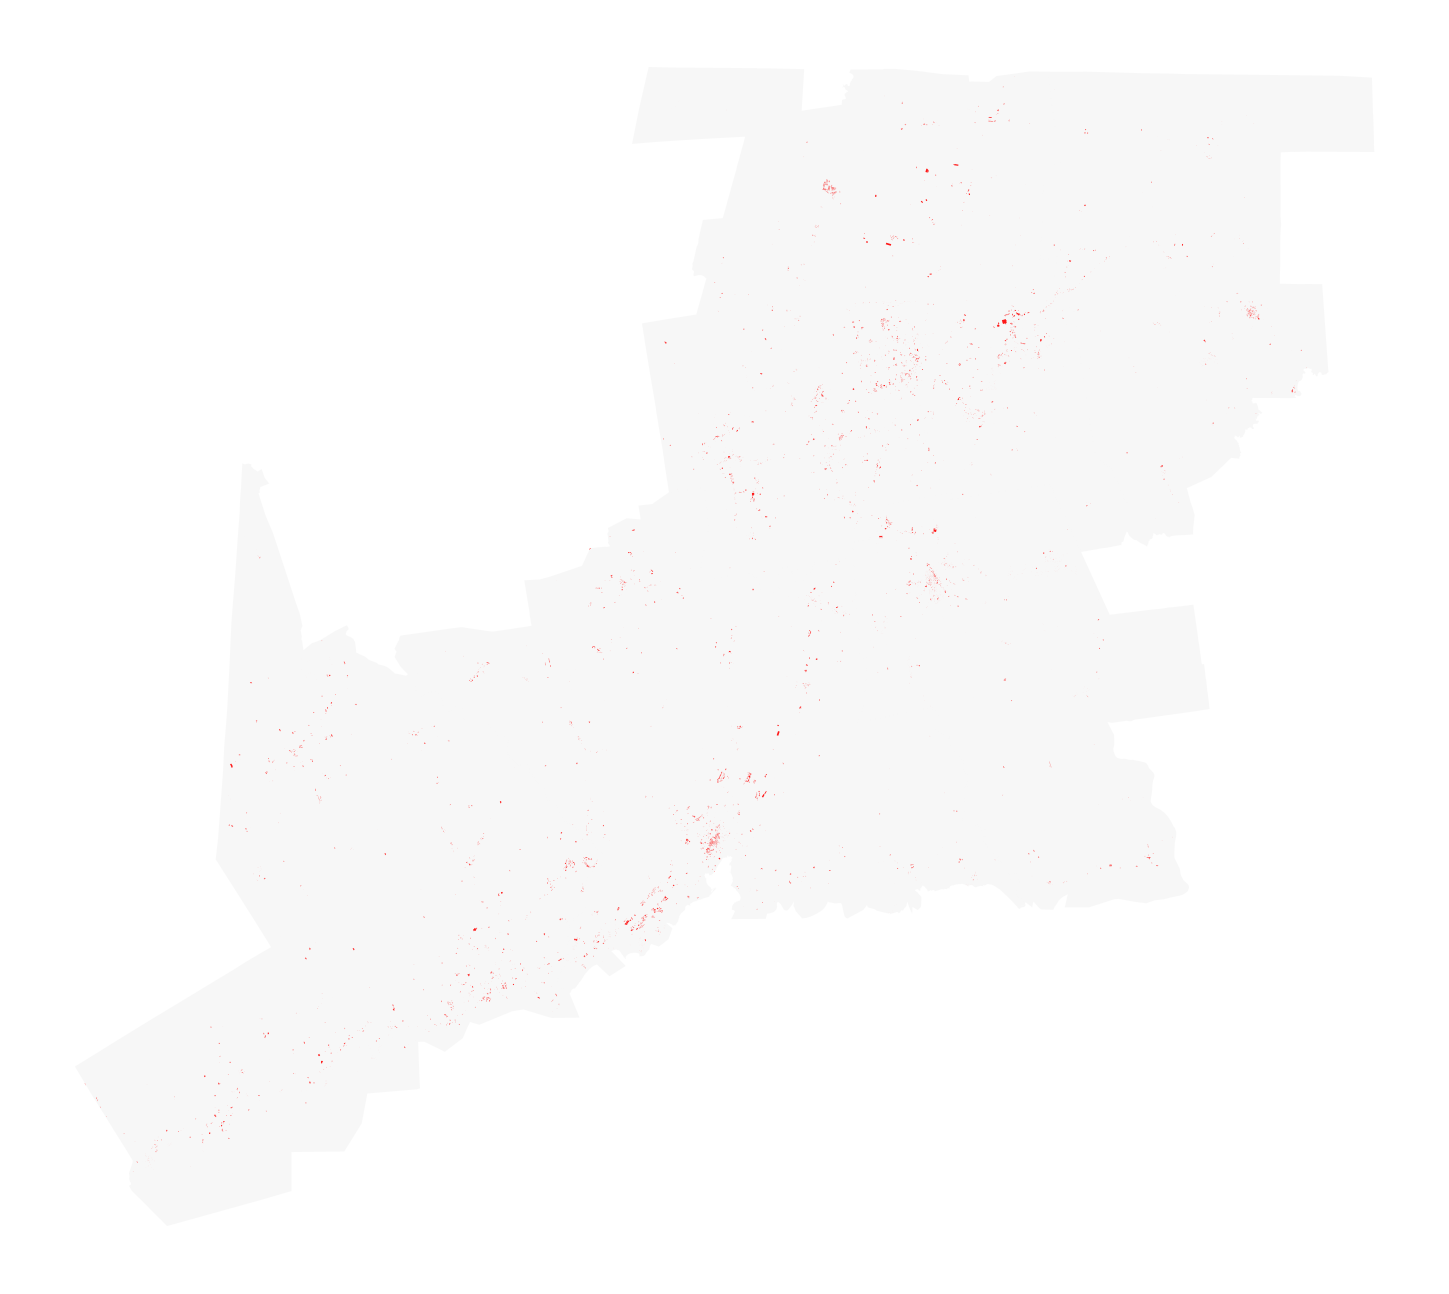

In [22]:
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and defined 'area' and 'blgds_no_nodes'

fig, ax = plt.subplots(figsize=(15, 15))

# Set a darker background color with higher alpha
ax.set_facecolor('#40432f')  # You can replace '#333333' with the color you want
ax.set_alpha(0.1)  # Adjust the alpha value (transparency)

area.plot(ax=ax, facecolor='0.9', alpha=0.3)
blgds_no_nodes = bldgs.iloc[bldgs.index.get_level_values('element_type') != 'node']['geometry']
blgds_no_nodes.plot(ax=ax, facecolor='red', alpha=0.9)

plt.tight_layout()
ax.axis('off')

# Uncomment the line below if you want to save the plot
# plt.savefig('../figures/pv-buildings.png', dpi=120)

plt.show()

